## MTA Project

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import math 
 
import random
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [162]:
#engine=create_engine("sqlite3:///mta_project.db")

### step 1: load Data: 3 month (march - April - may)

In [163]:
import pandas as pd 
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs =[]
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
week_nums = [210529,210522,210508,210501,210424,210417,210410,210403,210327,210320,210313,210306]
mta = get_data(week_nums)



mta.to_csv("data1.csv",index=False)

In [164]:
#connect=connect("")
#mta.to_sql("data1",connect)
#mta=pd.read_sql("SELECT * FROM data1",connect)

In [165]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///Data.db")
dff= pd.read_sql('SELECT* from data;',engine )

In [166]:
dff.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,00:00:00,REGULAR,7575503,2588978
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,04:00:00,RECOVR AUD,7575515,2588982
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,08:00:00,REGULAR,7575523,2588989
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,12:00:00,REGULAR,7575557,2588996
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,16:00:00,REGULAR,7575630,2589008


In [167]:
turnstiles_df.shape


(2508642, 13)

In [168]:
turnstiles_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC
208911,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,21:00:00,REGULAR,5554,577,2021-05-28 21:00:00,785.0
208910,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00,808.0
208909,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00,905.0
208908,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00,1246.0
208907,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35,977.0


In [169]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'DAILY_TRAFFIC'],
      dtype='object')

In [170]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [171]:
turnstiles_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC
208911,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,21:00:00,REGULAR,5554,577,2021-05-28 21:00:00,785.0
208910,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00,808.0
208909,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00,905.0
208908,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00,1246.0
208907,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35,977.0


## step 2:Data Cleaning

In [172]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1672431,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 18:00:00,1
1672424,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 14:00:00,1
1672425,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 18:00:00,1
1672426,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 22:00:00,1
1672427,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 02:00:00,1
1672428,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 06:00:00,1
1672429,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 10:00:00,1
1672430,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 14:00:00,1
1672432,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 22:00:00,1


In [173]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [174]:

# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1672431,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 18:00:00,1
1672424,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 14:00:00,1
1672425,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 18:00:00,1
1672426,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 22:00:00,1
1672427,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 02:00:00,1
1672428,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 06:00:00,1
1672429,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 10:00:00,1
1672430,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 14:00:00,1
1672432,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 22:00:00,1


In [175]:
turnstiles_df.isna().sum()


C/A                  0
UNIT                 0
SCP                  0
STATION              0
LINENAME             0
DIVISION             0
DATE                 0
TIME                 0
DESC                 0
ENTRIES              0
EXITS                0
DATE_TIME            0
DAILY_TRAFFIC    30105
dtype: int64

In [176]:
turnstiles_df.shape


(2508642, 13)

In [177]:

turnstiles_daily_entries = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily_entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,02/27/2021,7537589
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503
...,...,...,...,...,...,...
419419,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/24/2021,5554
419420,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/25/2021,5554
419421,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/26/2021,5554
419422,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2021,5554


In [178]:
turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-178-9d1332f75763>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries


In [ ]:
turnstiles_daily_entries.head()


In [ ]:
turnstiles_daily_entries.tail()

In [213]:

# Drop the rows for the earliest date in the df
turnstiles_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0


In [214]:
turnstiles_daily_entries["STATION"][turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]]


359                 59 ST
3277           57 ST-7 AV
3278           57 ST-7 AV
3279           57 ST-7 AV
3280           57 ST-7 AV
               ...       
415893    EASTCHSTER/DYRE
415894    EASTCHSTER/DYRE
415895    EASTCHSTER/DYRE
416265         ST. GEORGE
419337      RIT-ROOSEVELT
Name: STATION, Length: 3856, dtype: object

In [215]:
turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]].head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
359,A002,R051,02-03-02,59 ST,03/22/2021,238,03/21/2021,6641395.0,238.0
3277,A011,R080,01-03-00,57 ST-7 AV,02/28/2021,885620240,02/27/2021,885620355.0,115.0
3278,A011,R080,01-03-00,57 ST-7 AV,03/01/2021,885620021,02/28/2021,885620240.0,219.0
3279,A011,R080,01-03-00,57 ST-7 AV,03/02/2021,885619834,03/01/2021,885620021.0,187.0
3280,A011,R080,01-03-00,57 ST-7 AV,03/03/2021,885619673,03/02/2021,885619834.0,161.0


In [216]:
turnstiles_daily_entries['STATION'].value_counts()


34 ST-PENN STA     8475
FULTON ST          7966
GRD CNTRL-42 ST    7343
23 ST              6058
86 ST              5393
                   ... 
VAN SICLEN AVE      249
HARLEM 148 ST       248
CLEVELAND ST        166
SUTTER AV           166
ORCHARD BEACH        31
Name: STATION, Length: 379, dtype: int64

In [217]:
# Let's see how many stations have this problem

(turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-03-02  59 ST               1
A011   R080  01-03-00  57 ST-7 AV         83
             01-03-03  57 ST-7 AV          1
             01-03-04  57 ST-7 AV          1
A013   R081  01-06-01  49 ST               1
                                          ..
R622   R123  00-00-00  FRANKLIN AV        82
R624   R124  00-00-02  KINGSTON AV         1
R730   R431  00-00-04  EASTCHSTER/DYRE    82
S101   R070  00-00-04  ST. GEORGE          1
TRAM2  R469  00-05-00  RIT-ROOSEVELT       1
Length: 210, dtype: int64

In [218]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily_entries["DAILY_ENTRIES"] = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter=1000000)


238 6641395.0
3194 1390173.0
18 4340953.0
117 11715665.0
738 18398229.0
3816 756269765.0
262152 553649999.0
262152 229572623.0
0 5309746.0
80 1640812.0
101 2651127.0
104 17275602.0
262272 2255518.0
393225 7714275.0
2147432315 8421808.0
16712028 6294957.0
177 16712669.0
262144 33554713.0
24 2627860.0
106 67960951.0
232 4735529.0
147 11567738.0
1938 8880997.0
1950 13809288.0
54 7903750.0
113 4454729.0
158 7643335.0
471 1377273.0
0 67108864.0
217 4780275.0
262297 1566066.0
1534984195 0.0
4 1534984197.0
67109632 1.0
23157312 1627480738.0
35 10195434.0
5863 6101664.0
3178 1110928.0
327 2524852.0
262150 2393328.0
262152 67112607.0
67436550 375578.0
143 4070964.0
5 58304715.0
0 2042881.0
262144 537268042.0
528 2337665.0
33030166 42.0
95 5198958.0
79 1663686.0
262145 67109778.0
77 2320032.0
36 1380657.0
175 315605508.0
852524 2830560.0
66470 17650908.0
357 4470823.0
70 30154514.0
1040213826 4086923.0
151200964 50928236.0
73220297 1560551488.0
146672100 1123536751.0
1191138042 12132662.0
536886

In [219]:
def get_daily_counts(row, max_counter):
    counter = abs(row["ENTRIES"] - row["PREV_ENTRIES"])
    if counter > max_counter:
        counter = row["ENTRIES"]
    return counter
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter=100000)

In [220]:
turnstiles_daily_entries.size


3729375

In [221]:
turnstiles_daily_entries.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0


In [222]:
station_daily_entries = turnstiles_daily_entries.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_ENTRIES'].sum().reset_index()
station_daily_entries.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,02/28/2021,2002.0
1,A002,R051,59 ST,03/01/2021,4187.0
2,A002,R051,59 ST,03/02/2021,4459.0
3,A002,R051,59 ST,03/03/2021,4575.0
4,A002,R051,59 ST,03/04/2021,4526.0


In [223]:
#grouping data by stations and data to find a sum of daily entries
station_daily_entries = \
(turnstiles_daily_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum()
                 .reset_index())
station_daily_entries.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,02/28/2021,3639.0
1,1 AV,03/01/2021,6086.0
2,1 AV,03/02/2021,6254.0
3,1 AV,03/03/2021,6557.0
4,1 AV,03/04/2021,6506.0


In [224]:
# finding out the stations with the highest traffic during the time I investigate

station_totals = station_daily_entries.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,3819685.0
1,34 ST-HERALD SQ,3379618.0
2,86 ST,3206624.0
3,GRD CNTRL-42 ST,2846776.0
4,125 ST,2814833.0


In [225]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1672431,R138,R293,00-05-01,34 ST-PENN STA,2021-04-23 18:00:00,1
1672424,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 14:00:00,1
1672425,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 18:00:00,1
1672426,R138,R293,00-05-01,34 ST-PENN STA,2021-04-22 22:00:00,1


In [226]:
turnstiles_daily_exits = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())
turnstiles_daily_exits

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,02/27/2021,2570596
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472
...,...,...,...,...,...,...
419419,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/24/2021,574
419420,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/25/2021,574
419421,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/26/2021,577
419422,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2021,577


In [227]:
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-227-1abf788fe487>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits


In [228]:
turnstiles_daily_exits.head()


,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,02/27/2021,2570596,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0


In [229]:
# Drop the rows for the earliest date in the df
turnstiles_daily_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0
5,A002,R051,02-00-00,59 ST,03/04/2021,2571750,03/03/2021,2571472.0


In [230]:
turnstiles_daily_exits["STATION"][turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]]


359               59 ST
3277         57 ST-7 AV
3278         57 ST-7 AV
3279         57 ST-7 AV
3280         57 ST-7 AV
              ...      
404138      FRANKLIN AV
405159      KINGSTON AV
416265       ST. GEORGE
419333    RIT-ROOSEVELT
419337    RIT-ROOSEVELT
Name: STATION, Length: 2846, dtype: object

In [231]:
turnstiles_daily_exits["STATION"][turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]].head


<bound method NDFrame.head of 359               59 ST
3277         57 ST-7 AV
3278         57 ST-7 AV
3279         57 ST-7 AV
3280         57 ST-7 AV
              ...      
404138      FRANKLIN AV
405159      KINGSTON AV
416265       ST. GEORGE
419333    RIT-ROOSEVELT
419337    RIT-ROOSEVELT
Name: STATION, Length: 2846, dtype: object>

In [232]:
turnstiles_daily_exits['STATION'].value_counts()


34 ST-PENN STA     8475
FULTON ST          7966
GRD CNTRL-42 ST    7343
23 ST              6058
86 ST              5393
                   ... 
VAN SICLEN AVE      249
HARLEM 148 ST       248
CLEVELAND ST        166
SUTTER AV           166
ORCHARD BEACH        31
Name: STATION, Length: 379, dtype: int64

In [233]:
(turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())


C/A    UNIT  SCP       STATION      
A002   R051  02-03-02  59 ST             1
A011   R080  01-03-00  57 ST-7 AV       83
             01-03-03  57 ST-7 AV        1
             01-03-04  57 ST-7 AV        1
A013   R081  01-06-01  49 ST             1
                                        ..
R617   R058  00-00-02  BERGEN ST         1
R622   R123  00-00-00  FRANKLIN AV      83
R624   R124  00-00-02  KINGSTON AV       1
S101   R070  00-00-04  ST. GEORGE        1
TRAM2  R469  00-05-00  RIT-ROOSEVELT     2
Length: 206, dtype: int64

In [234]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_exits["DAILY_EXITS"] = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter=1000000)

88 8869456.0
184 29823169.0
295 7504407.0
2140 436767770.0
0 469762048.0
8 763625201.0
0 3196184.0
137 2192493.0
161 1075170.0
116 1481691.0
0 1377854.0
671146416 2645604.0
39 2375240.0
66 2944229.0
135 134694104.0
68 1090165.0
51 6430045.0
1429 15269731.0
58 6427794.0
145 2774389.0
54 6592830.0
766 1731707.0
2 16777325.0
133 8070982.0
563806220 0.0
236 563806220.0
56710393 1627593327.0
158 11465591.0
4351 3350287.0
5506 1150163.0
1073 2809308.0
14 3077761.0
3 16777216.0
189 5011886.0
0 11489500.0
0 3698310.0
1 134237104.0
654311428 0.0
131206 3684372.0
74 4035691.0
241 10121717.0
0 16777216.0
390 6668124.0
573 1332376.0
30 1843213.0
371 1508657839.0
1910 11973082.0
181 2046962.0
67 2694408.0
2013271707 7892372.0
167977315 51050462.0
17316031 134318115.0
16813981 71276.0
175524694 1980413870.0
1140895657 4481853.0
1174454286 4599885.0
168 10879546.0
8 1010668.0
470 1815879.0
469 8157347.0
3980632 0.0
0 3980632.0


In [235]:
def get_daily_counts(row, max_counter):
    counter = abs(row["EXITS"] - row["PREV_EXITS"])
    if counter > max_counter:
        counter = row["EXITS"]
    return counter
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter=100000)

In [236]:
turnstiles_daily_exits.head()


,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0,121.0
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0,251.0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0,243.0
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0,261.0
5,A002,R051,02-00-00,59 ST,03/04/2021,2571750,03/03/2021,2571472.0,278.0


In [237]:
station_daily_exits = turnstiles_daily_exits.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_EXITS'].sum().reset_index()
station_daily_exits.head()

,C/A,UNIT,STATION,DATE,DAILY_EXITS
0,A002,R051,59 ST,02/28/2021,1554.0
1,A002,R051,59 ST,03/01/2021,3425.0
2,A002,R051,59 ST,03/02/2021,3541.0
3,A002,R051,59 ST,03/03/2021,3808.0
4,A002,R051,59 ST,03/04/2021,3633.0


In [238]:
#grouping data by stations and data to find a sum of daily exits
station_daily_exits = \
(turnstiles_daily_exits.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum()
                 .reset_index())
station_daily_exits.head()


,STATION,DATE,DAILY_EXITS
0,1 AV,02/28/2021,6155.0
1,1 AV,03/01/2021,9311.0
2,1 AV,03/02/2021,9793.0
3,1 AV,03/03/2021,10109.0
4,1 AV,03/04/2021,10152.0


In [239]:
station_totals = station_daily_exits.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals.head()


,STATION,DAILY_EXITS
0,34 ST-PENN STA,4374170.0
1,34 ST-HERALD SQ,4195633.0
2,125 ST,3535569.0
3,86 ST,3499185.0
4,GRD CNTRL-42 ST,2838703.0


##### Calculating DAILY TRAFFIC by adding the turnstiles daily entries and turnstiles daily exits:


In [240]:
turnstiles_df['DAILY_TRAFFIC'] = (turnstiles_daily_entries['DAILY_ENTRIES'] + turnstiles_daily_exits['DAILY_EXITS'])


In [241]:
turnstiles_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC
208911,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,21:00:00,REGULAR,5554,577,2021-05-28 21:00:00,785.0
208910,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00,808.0
208909,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00,905.0
208908,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00,1246.0
208907,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35,977.0


In [248]:
#grouping the same data above by stations to find of a sum of daily entires and exists for top 5 stations
top5_stations = (turnstiles_df.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=False) 
                   .STATION.head())
top5_stations

226          FULTON ST
59     34 ST-HERALD SQ
61      34 ST-PENN STA
46               23 ST
173           CANAL ST
Name: STATION, dtype: object

In [249]:

top5_stations_traffic = \
     turnstiles_df[turnstiles_df['STATION'].isin(top5_stations)].sort_values(by='DAILY_TRAFFIC',ascending=False)
top5_stations_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC
3682,A025,R023,01-03-00,34 ST-HERALD SQ,BDFMNQRW,BMT,05/23/2021,16:00:00,REGULAR,8509907,3228276,2021-05-23 16:00:00,998348.0
3682,A025,R023,01-00-03,34 ST-HERALD SQ,BDFMNQRW,BMT,05/17/2021,16:00:00,REGULAR,9032379,2155887,2021-05-17 16:00:00,998348.0
3682,A025,R023,01-00-03,34 ST-HERALD SQ,BDFMNQRW,BMT,03/05/2021,07:00:00,REGULAR,8976420,2138802,2021-03-05 07:00:00,998348.0
3682,A025,R023,01-00-03,34 ST-HERALD SQ,BDFMNQRW,BMT,03/26/2021,08:00:00,REGULAR,8991580,2143504,2021-03-26 08:00:00,998348.0
3682,A025,R023,01-00-03,34 ST-HERALD SQ,BDFMNQRW,BMT,04/08/2021,16:00:00,REGULAR,9001598,2146595,2021-04-08 16:00:00,998348.0


In [ ]:
base_color=sns.color_palette()[]
plt

In [259]:
station_daily = turnstiles_df.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_TRAFFIC'].sum().reset_index()
station_daily.head()


,C/A,UNIT,STATION,DATE,DAILY_TRAFFIC
0,A002,R051,59 ST,02/27/2021,51397.0
1,A002,R051,59 ST,02/28/2021,60028.0
2,A002,R051,59 ST,03/01/2021,56165.0
3,A002,R051,59 ST,03/02/2021,57696.0
4,A002,R051,59 ST,03/03/2021,96420.0


In [264]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()

In [265]:
station_totals.head()

,STATION,DAILY_TRAFFIC
0,FULTON ST,44017645.0
1,34 ST-HERALD SQ,37552110.0
2,34 ST-PENN STA,34095417.0
3,23 ST,33941154.0
4,CANAL ST,33852707.0


## step 3:Data visualization

## Plot


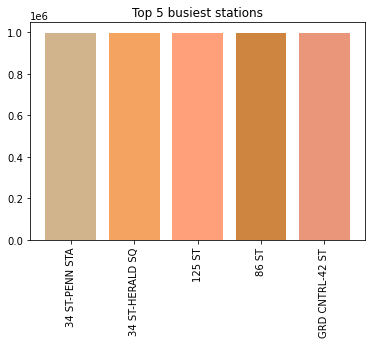

In [252]:
#barplot top 5 stations
base_color = sns.color_palette()[0]

plt.bar(x=station_totals['STATION'][:5], height=top5_stations_traffic['DAILY_TRAFFIC'][:5], color=['tan','sandybrown','lightsalmon','peru','darksalmon'])
plt.xticks(rotation=90)
plt.title('Top 5 busiest stations')
plt.savefig('top5_stations_traffic.png');


In [260]:
# plot the daily time series for a station
#Plot the daily time series for a station.
station_daily_34_ST= station_daily[station_daily['STATION'] == '34 ST-PENN STA']
station_daily_34_ST.head()



,C/A,UNIT,STATION,DATE,DAILY_TRAFFIC
18729,N067,R012,34 ST-PENN STA,02/27/2021,105689.0
18730,N067,R012,34 ST-PENN STA,02/28/2021,65975.0
18731,N067,R012,34 ST-PENN STA,03/01/2021,68403.0
18732,N067,R012,34 ST-PENN STA,03/02/2021,67852.0
18733,N067,R012,34 ST-PENN STA,03/03/2021,68876.0


Text(0.5, 1.0, 'Daily Entries for 34 ST- PENN STA Station')

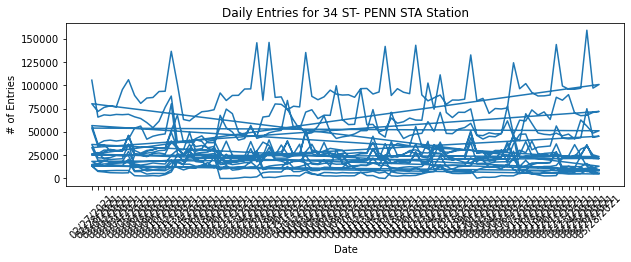

In [269]:
plt.figure(figsize=(10,3))
plt.plot(station_daily_34_ST['DATE'], station_daily_34_ST['DAILY_TRAFFIC'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 34 ST- PENN STA Station')

In [270]:
station_daily_34_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_ST['DATE']).dt.dayofweek
station_daily_34_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_ST['DATE']).dt.week
station_daily_34_ST.head()

<ipython-input-270-cf80f0b1d3c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_ST['DATE']).dt.dayofweek
<ipython-input-270-cf80f0b1d3c2>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_34_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_ST['DATE']).dt.week
<ipython-input-270-cf80f0b1d3c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,C/A,UNIT,STATION,DATE,DAILY_TRAFFIC,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
18729,N067,R012,34 ST-PENN STA,02/27/2021,105689.0,5,8
18730,N067,R012,34 ST-PENN STA,02/28/2021,65975.0,6,8
18731,N067,R012,34 ST-PENN STA,03/01/2021,68403.0,0,9
18732,N067,R012,34 ST-PENN STA,03/02/2021,67852.0,1,9
18733,N067,R012,34 ST-PENN STA,03/03/2021,68876.0,2,9


Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STAstation')

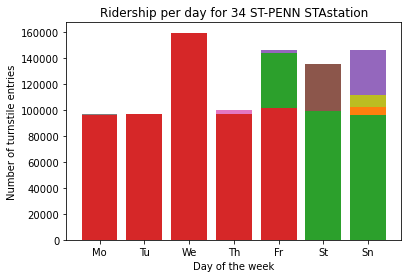

In [273]:
for i, group in station_daily_34_ST.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFFIC'])
   
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34 ST-PENN STAstation')

Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STAstation')

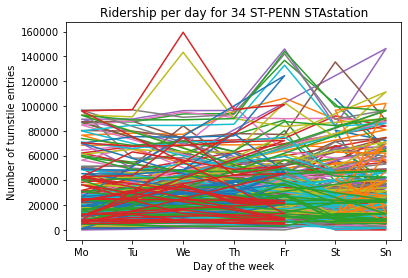

In [274]:
for i, group in station_daily_34_ST.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFFIC'])
   
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34 ST-PENN STAstation')